In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
ttdf = pd.read_csv("Titanic-Dataset.csv")
ttdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#check missing values
ttdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
age_median = ttdf["Age"].median()
age_median

np.float64(28.0)

In [14]:
ttdf["Age"].fillna(age_median, inplace=True)
ttdf.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_19112\97782564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ttdf["Age"].fillna(age_median, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
embarked_mode = ttdf["Embarked"].mode()[0]
embarked_mode

'S'

In [18]:
ttdf["Embarked"].fillna(embarked_mode, inplace=True)
ttdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
ttdf.drop(columns=['Cabin','Ticket'], inplace=True)
ttdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [21]:
ttdf.duplicated().sum()

np.int64(0)

In [23]:
# have unique dataset records.
ttdf.drop_duplicates(inplace=True)

In [32]:
def detect_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75) 
    iqr = q3 - q1
    print("q1,q3,iqr")
    print(q1,q3,iqr)
    upr_bound = q3 + (1.5 * iqr)
    low_bound = q1 - (1.5 * iqr)
    print("low_bound : ", low_bound)
    print("upr_bound : ", upr_bound)
    outlier = (column < low_bound) | (column > upr_bound)
    print("outlier : ", outlier)
    print("\n")
    return outlier

In [ ]:
ttdf["Age Outliers"] = detect_outliers_iqr(ttdf["Age"])
(ttdf["Age Outliers"] == True).value_counts() # 66 outliers


q1,q3,iqr
22.0 35.0 13.0
low_bound :  2.5
upr_bound :  54.5
outlier :  0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool




Age Outliers
False    825
True      66
Name: count, dtype: int64

In [34]:
ttdf["Fare Outliers"] = detect_outliers_iqr(ttdf["Fare"])
ttdf["Fare Outliers"]

q1,q3,iqr
7.9104 31.0 23.0896
low_bound :  -26.724
upr_bound :  65.6344
outlier :  0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool




0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare Outliers, Length: 891, dtype: bool

In [40]:
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Age Dist with Outliers')

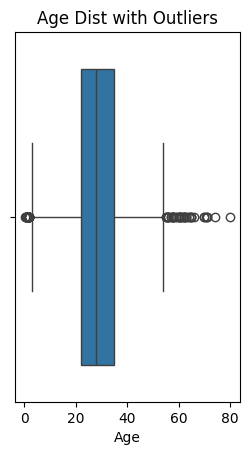

In [44]:
plt.subplot(1,2,1)
sns.boxplot(x=ttdf['Age'])
plt.title('Age Dist with Outliers')

In [74]:
ttdf['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [75]:
ttdf[ttdf["Age Outliers"] == False]['Age'] # Filter

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 825, dtype: float64

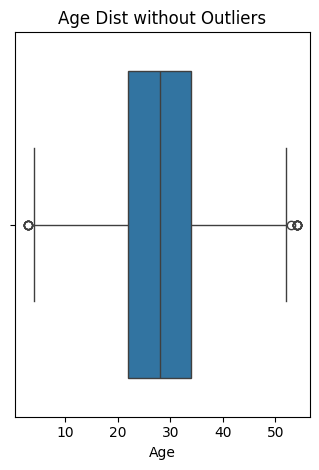

In [ ]:
plt.subplot(1,2,1)
# - selects rows in the DataFrame where the "Age Outliers" column is False
sns.boxplot(x=ttdf[ttdf["Age Outliers"] == False]['Age']) 
plt.title('Age Dist without Outliers')
plt.tight_layout()
plt.show()

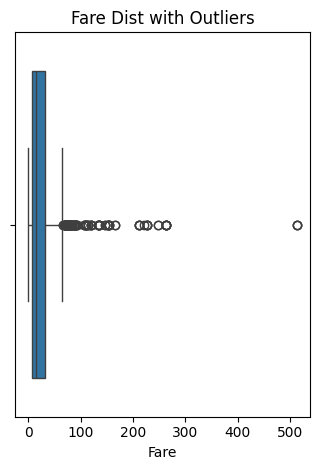

In [78]:
plt.subplot(1,2,1)
sns.boxplot(x=ttdf['Fare'])
plt.title('Fare Dist with Outliers')
plt.tight_layout()
plt.show()

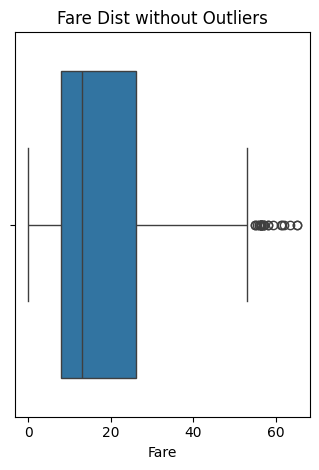

In [77]:
plt.subplot(1,2,1)
# - selects rows in the DataFrame where the "Fare Outliers" column is False
sns.boxplot(x=ttdf[ttdf["Fare Outliers"] == False]['Fare']) 
plt.title('Fare Dist without Outliers')
plt.tight_layout()
plt.show()

In [80]:
ttdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
ttdf_cleaned = ttdf[~ ( ttdf['Age Outliers']  |  ttdf['Fare Outliers']  ) ]
ttdf_cleaned.describe()

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    male  22.0      1      0   
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
5                                Moran, Mr. James    male  28.0      0      0   
..                     